In [76]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [77]:

from __future__ import absolute_import,division,print_function,unicode_literals

from tensorflow.keras import datasets,layers,models


(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#x_train = x_train.reshape(x_train.shape[0], 32,32, 3)
#x_test =  x_test.reshape(x_test.shape[0], 32,32, 3)

x_train,x_test=x_train/255.0,x_test/255.0



In [78]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [79]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3) ,activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

print(model.summary())





Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [80]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

opt=tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.9, nesterov=False, name='sgd'
)

model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=10,batch_size=50,validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 57s 58ms/step - loss: 2.0233 - accuracy: 0.2469 - val_loss: 1.4692 - val_accuracy: 0.4621
Epoch 2/10
800/800 [==============================] - 46s 58ms/step - loss: 1.3801 - accuracy: 0.5030 - val_loss: 1.2227 - val_accuracy: 0.5601
Epoch 3/10
800/800 [==============================] - 41s 51ms/step - loss: 1.1677 - accuracy: 0.5849 - val_loss: 1.1104 - val_accuracy: 0.6078
Epoch 4/10
800/800 [==============================] - 38s 48ms/step - loss: 1.0251 - accuracy: 0.6372 - val_loss: 1.0221 - val_accuracy: 0.6460
Epoch 5/10
800/800 [==============================] - 39s 48ms/step - loss: 0.9127 - accuracy: 0.6773 - val_loss: 0.9947 - val_accuracy: 0.6516
Epoch 6/10
800/800 [==============================] - 37s 46ms/step - loss: 0.8315 - accuracy: 0.7057 - val_loss: 0.9885 - val_accuracy: 0.6602
Epoch 7/10
800/800 [==============================] - 39s 49ms/step - loss: 0.7669 - accuracy: 0.7309 - val_loss: 0.9391 - val_accuracy:

313/313 - 3s - loss: 0.9897 - accuracy: 0.6829


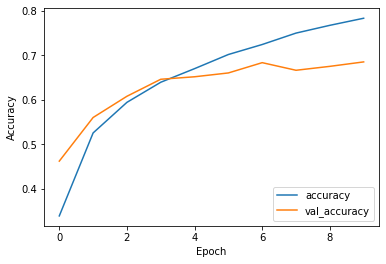

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [82]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras


In [123]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [124]:
K =len(np.unique(y_train))
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [125]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.5e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
#val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

indices = np.arange(Ntr)
rng.shuffle(indices)
x=x_train[indices]
y=y_train[indices]

y_p=x.dot(w1)+b1
print(y_p.shape)
print(y_train.shape)
print(y_test.shape)

w1: (3072, 10)
b1: (10,)
(50000, 10)
(50000, 10)
(10000, 10)


In [126]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    y_p=x.dot(w1)+b1
    loss=(1./batch_size)*np.square(y_p-y).sum()+reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%5==0:
        print('iteration %d : loss %f' % (t,loss))
    
    items=y_p.shape[0]
    dy_y_p=(1./batch_size)*2.0*(y_p-y)
    dy_w1=x.T.dot(dy_y_p)+reg*w1
    dy_b1=dy_y_p.sum(axis=0)

    w1 -=lr*dy_w1
    b1 -=lr*dy_b1
    lr *=lr_decay

iteration 0 : loss 1.000012
iteration 5 : loss 0.903809
iteration 10 : loss 0.873285
iteration 15 : loss 0.853346
iteration 20 : loss 0.839072
iteration 25 : loss 0.828537
iteration 30 : loss 0.820630
iteration 35 : loss 0.814618
iteration 40 : loss 0.809989
iteration 45 : loss 0.806380
iteration 50 : loss 0.803529
iteration 55 : loss 0.801246
iteration 60 : loss 0.799390
iteration 65 : loss 0.797859
iteration 70 : loss 0.796577
iteration 75 : loss 0.795487
iteration 80 : loss 0.794548
iteration 85 : loss 0.793727
iteration 90 : loss 0.793000
iteration 95 : loss 0.792350
iteration 100 : loss 0.791762
iteration 105 : loss 0.791225
iteration 110 : loss 0.790731
iteration 115 : loss 0.790274
iteration 120 : loss 0.789848
iteration 125 : loss 0.789448
iteration 130 : loss 0.789073
iteration 135 : loss 0.788718
iteration 140 : loss 0.788383
iteration 145 : loss 0.788064
iteration 150 : loss 0.787760
iteration 155 : loss 0.787470
iteration 160 : loss 0.787193
iteration 165 : loss 0.786927
it

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

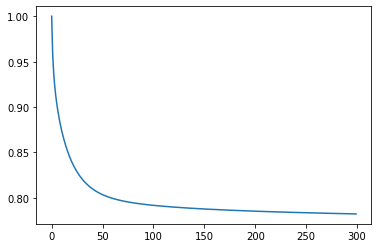

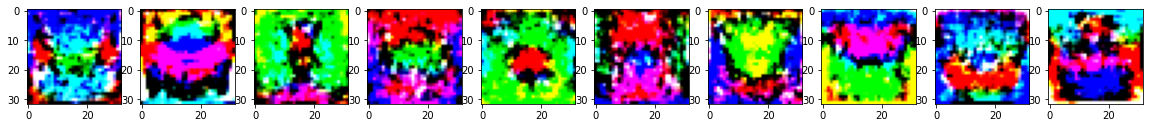

In [127]:
plt.plot(loss_history)
 
f,ax=plt.subplots(1,10)
f.set_size_inches(20,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show()

In [145]:

x_t=x_train
y_p=x_t.dot(w1)+b1

train_loss=(1/Ntr)*(np.square(y_train-y_p)).sum()
acc_track=0
for i in range(y_train.shape[0]):
    listp = y_p[i].tolist()
    listT = y_train[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
train_accuracy=(1/Ntr)*acc_track
    


#train_accuracy=1-(1/Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_p,axis=1))).sum()


x_t=x_test
y_p=x_t.dot(w1)+b1
test_loss=(1/Nte)*(np.square(y_test-y_p)).sum()

acc_track=0
for i in range(y_test.shape[0]):
    listp = y_p[i].tolist()
    listT = y_test[i].tolist()
    if listp.index(max(listp))==listT.index(max(listT)):
        acc_track+=1
test_accuracy=(1/Nte)*acc_track
    

print('Training Loss :',train_loss)
print('Training Accuracy :',train_accuracy)




print('Testing Loss :',test_loss)
print('Testing Accuracy :',test_accuracy)

Training Loss : 0.7823159825951956
Training Accuracy : 0.42028000000000004
Testing Loss : 0.787319194328649
Testing Accuracy : 0.4055


In [142]:
x=np.array([[1,2],[2,3]])
print(x[1][1])
print(x.shape[0])
list1 = y_train[1].tolist()
print(list1)
print(list1.index(max(list1)))

3
2
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
9
